In [168]:
import torch
from torchvision import datasets, transforms
import helper
import numpy as np

# Define a transform to normalize the data
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load the training data
train_set = datasets.ImageFolder('out/', transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# # Load the test data
test_set = datasets.ImageFolder('out/', transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [169]:
images, labels = next(iter(train_loader))
print(images.shape)
images = torch.reshape(images, (64, 784))
print(images.shape)
print(labels)

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
tensor([4, 1, 4, 0, 5, 2, 3, 1, 6, 7, 0, 1, 6, 4, 3, 3, 4, 0, 0, 1, 4, 9, 1, 5,
        6, 9, 5, 6, 1, 7, 3, 6, 6, 8, 0, 6, 6, 9, 4, 4, 8, 8, 5, 7, 7, 4, 5, 1,
        5, 4, 6, 3, 0, 6, 1, 5, 8, 7, 4, 6, 7, 1, 1, 8])


In [170]:
from torch import nn
from torch import optim
import torch.nn.functional as F

# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 256),
                     nn.ReLU(),
                     nn.Linear(256, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax()
)


In [171]:
# Define the loss
criterion = nn.CrossEntropyLoss()

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.03)

In [206]:
epochs = 100
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        images = images.view(images.shape[0], -1)
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()

        # Forward pass, then backward pass, then update weights
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(train_loader)}")

Training loss: 1.2469811758417992
Training loss: 1.2076990820799665
Training loss: 1.1690685411167752
Training loss: 1.1332737385847007
Training loss: 1.1023601061978918
Training loss: 1.0549434985324835
Training loss: 1.0186942466505013
Training loss: 0.9756497418045238
Training loss: 0.9545071466713194
Training loss: 0.919082395590035
Training loss: 0.8828475406974744
Training loss: 0.8307422528600996
Training loss: 0.804895926053357
Training loss: 0.767853730613259
Training loss: 0.743771160863767
Training loss: 0.6819771718067728
Training loss: 0.6655585706993273
Training loss: 0.6160741780593897
Training loss: 0.5926250974843457
Training loss: 0.5579699473396228
Training loss: 0.5354408054215134
Training loss: 0.47255106175401407
Training loss: 0.4747612968941403
Training loss: 0.4381585018649982
Training loss: 0.40829536603514555
Training loss: 0.3821072951433765
Training loss: 0.3324835199838991
Training loss: 0.29507004289300576
Training loss: 0.3099006745181266
Training loss: 

KeyboardInterrupt: 

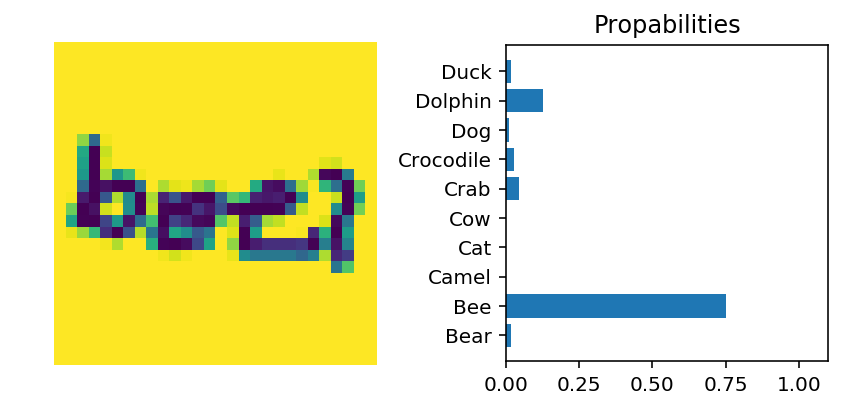

In [218]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import matplotlib.pyplot as plt

# Test out your network!

dataiter = iter(test_loader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)
    
ps = torch.exp(logps)

# Plot the image and probabilities
img = img.resize_(1, 28, 28)
ps = ps.data.numpy().squeeze()

fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')
ax2.barh(np.arange(10), ps)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(['Bear',
                    'Bee',
                    'Camel',
                    'Cat',
                    'Cow',
                    'Crab',
                    'Crocodile',
                    'Dog',
                    'Dolphin',
                    'Duck'])
ax2.set_title('Propabilities')
ax2.set_xlim(0, 1.1)

plt.tight_layout()